<Figure size 10000x4800 with 0 Axes>

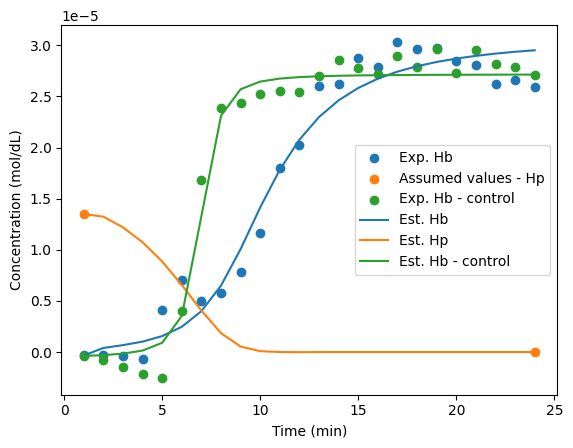

<Figure size 10000x4800 with 0 Axes>

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.optimize import Bounds
from plotdf import plotdf

data = pd.read_excel('data.xlsx')
s=1.38476998e-05
mu=7
time = np.linspace(1, 24, 24)
hbin = 2.7E-5
hpin = hbin/2
hpx = [1, 24]
hpy = [hpin, 0]
ic = ([data.loc[0, "hpadj mol/dL"], hpin, data.loc[0, "cadj mol/dL"]])
ac = (1, 10E5, s*3, 8, 1, 3/2)

def func(x, t, yB, kr, sB, muB, zB, rB):
    B, P, C = x
    dB = - kr * B * P + sB/((((t*yB-muB)**2)+zB)**(rB))
    dP = - kr * B * P
    dC = s/((((t-mu)**2)+1)**(3/2))
    return(dB, dP, dC)

def func2(B, P, t, yB, kr, sB, muB, zB, rB):
    dB = - kr * B * P + sB/((((t*yB-muB)**2)+zB)**(rB))
    dP = - kr * B * P
    dC = s/((((t-mu)**2)+1)**(3/2))
    return(dB, dP, dC)

fitdata = odeint(func, ic, data["time"], args=(4.35923617e-01, 1.51728394e+05, 4.56628831e-05, 3.63518130e+00,
       4.51944641e+00, 1.47636087e+00))
plt.scatter(data["time"], data['hpadj mol/dL'], label = "Exp. Hb")
plt.scatter(hpx, hpy, label = "Assumed values - Hp")
plt.scatter(data["time"], data['cadj mol/dL'], label = "Exp. Hb - control")
plt.plot(data["time"], fitdata[:,0], label = "Est. Hb")
plt.plot(data["time"], fitdata[:,1], label = "Est. Hp")
plt.plot(data["time"], fitdata[:,2], label = "Est. Hb - control")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (mol/dL)")
plt.legend(loc = "right")
plt.figure(figsize = (100, 48))

<Figure size 10000x4800 with 0 Axes>

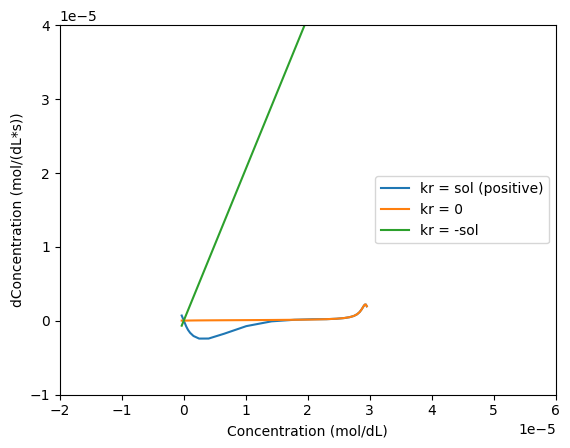

<Figure size 10000x4800 with 0 Axes>

In [6]:
dHb2 = np.array(func2(B = fitdata[:,0], P = fitdata[:,1], t = data["time"], yB = 4.35923617e-01, kr = 1.51728394e+05, sB = 2.06724401e-05, muB = 9.82450961e+00, zB = 4.51944641e+00, rB = 1.47636087e+00))
fitdata_kr0 = odeint(func, ic, data["time"], args=(4.35923617e-01, 1.51728394e+05, 4.56628831e-05, 3.63518130e+00,
       4.51944641e+00, 1.47636087e+00))
dHb0 = np.array(func2(B = fitdata_kr0[:,0], P = fitdata_kr0[:,1], t = data["time"], yB = 4.35923617e-01, kr = 0, sB = 2.06724401e-05, muB = 9.82450961e+00, zB = 4.51944641e+00, rB = 1.47636087e+00))
fitdata_krneg = odeint(func, ic, data["time"], args=(4.35923617e-01, 0, 4.56628831e-05, 3.63518130e+00,
       4.51944641e+00, 1.47636087e+00))
dHbneg = np.array(func2(B = fitdata_krneg[:,0], P = fitdata_krneg[:,1], t = data["time"], yB = 4.35923617e-01, kr = -1.51728394e+05, sB = 2.06724401e-05, muB = 9.82450961e+00, zB = 4.51944641e+00, rB = 1.47636087e+00))
plt.plot(fitdata[:,0], dHb2[0, 0:24], label = "kr = sol (positive)")
plt.plot(fitdata_kr0[:,0], dHb0[0, 0:24], label = "kr = 0")
plt.plot(fitdata_krneg[:,0], dHbneg[0, 0:24], label = "kr = -sol")
plt.xlabel("Concentration (mol/dL)")
plt.ylabel("dConcentration (mol/(dL*s))")
plt.xlim(-2E-5, 6E-5)
plt.ylim(-1E-5, 4E-5)
plt.legend(loc = "right")
plt.figure(figsize = (100, 48))

<Figure size 10000x4800 with 0 Axes>

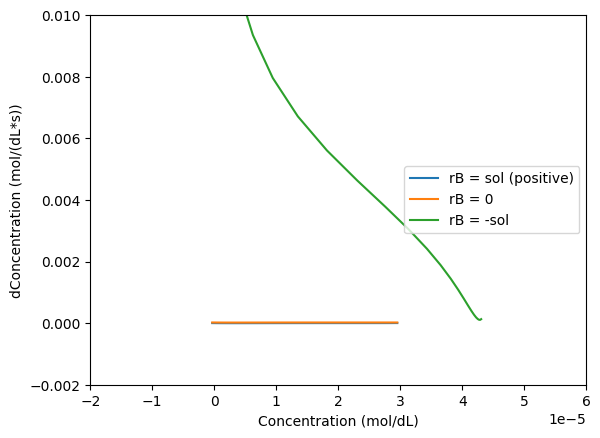

<Figure size 10000x4800 with 0 Axes>

In [20]:
dHb2 = np.array(func2(B = fitdata[:,0], P = fitdata[:,1], t = data["time"], yB = 4.35923617e-01, kr = 1.51728394e+05, sB = 2.06724401e-05, muB = 9.82450961e+00, zB = 4.51944641e+00, rB = 1.47636087e+00))
fitdata_rB0 = odeint(func, ic, data["time"], args=(4.35923617e-01, 1.51728394e+05, 4.56628831e-05, 3.63518130e+00,
       4.51944641e+00, 0))
dHb0 = np.array(func2(B = fitdata_kr0[:,0], P = fitdata_kr0[:,1], t = data["time"], yB = 4.35923617e-01, kr = 1.51728394e+05, sB = 2.06724401e-05, muB = 9.82450961e+00, zB = 4.51944641e+00, rB = 0))
fitdata_rBneg = odeint(func, ic, data["time"], args=(4.35923617e-01, 1.51728394e+05, 4.56628831e-05, 3.63518130e+00,
       4.51944641e+00, -1.47636087e+00))
dHbneg = np.array(func2(B = fitdata_krneg[:,0], P = fitdata_krneg[:,1], t = data["time"], yB = 4.35923617e-01, kr = 1.51728394e+05, sB = 2.06724401e-05, muB = 9.82450961e+00, zB = 4.51944641e+00, rB = -1.47636087e+00))
plt.plot(fitdata[:,0], dHb2[0, 0:24], label = "rB = sol (positive)")
plt.plot(fitdata_kr0[:,0], dHb0[0, 0:24], label = "rB = 0")
plt.plot(fitdata_krneg[:,0], dHbneg[0, 0:24], label = "rB = -sol")
plt.xlabel("Concentration (mol/dL)")
plt.ylabel("dConcentration (mol/(dL*s))")
plt.xlim(-2E-5, 6E-5)
plt.ylim(-2E-3, 1E-2)
plt.legend(loc = "right")
plt.figure(figsize = (100, 48))

<Figure size 10000x4800 with 0 Axes>

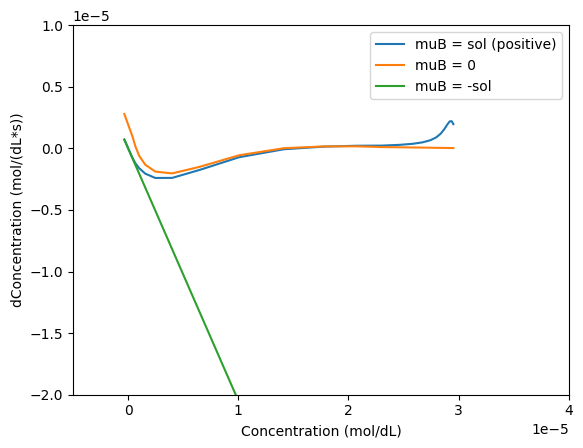

<Figure size 10000x4800 with 0 Axes>

In [24]:
dHb2 = np.array(func2(B = fitdata[:,0], P = fitdata[:,1], t = data["time"], yB = 4.35923617e-01, kr = 1.51728394e+05, sB = 2.06724401e-05, muB = 9.82450961e+00, zB = 4.51944641e+00, rB = 1.47636087e+00))
fitdata_rB0 = odeint(func, ic, data["time"], args=(4.35923617e-01, 1.51728394e+05, 4.56628831e-05, 3.63518130e+00,
       4.51944641e+00, 0))
dHb0 = np.array(func2(B = fitdata_kr0[:,0], P = fitdata_kr0[:,1], t = data["time"], yB = 4.35923617e-01, kr = 1.51728394e+05, sB = 2.06724401e-05, muB = 0, zB = 4.51944641e+00, rB = 1.47636087e+00))
fitdata_rBneg = odeint(func, ic, data["time"], args=(4.35923617e-01, 1.51728394e+05, 4.56628831e-05, 3.63518130e+00,
       4.51944641e+00, 1.47636087e+00))
dHbneg = np.array(func2(B = fitdata_krneg[:,0], P = fitdata_krneg[:,1], t = data["time"], yB = 4.35923617e-01, kr = 1.51728394e+05, sB = 2.06724401e-05, muB = -9.82450961e+00, zB = 4.51944641e+00, rB = 1.47636087e+00))
plt.plot(fitdata[:,0], dHb2[0, 0:24], label = "muB = sol (positive)")
plt.plot(fitdata_kr0[:,0], dHb0[0, 0:24], label = "muB = 0")
plt.plot(fitdata_krneg[:,0], dHbneg[0, 0:24], label = "muB = -sol")
plt.xlabel("Concentration (mol/dL)")
plt.ylabel("dConcentration (mol/(dL*s))")
plt.xlim(-.5E-5, 4E-5)
plt.ylim(-2E-5, 1E-5)
plt.legend(loc = "upper right")
plt.figure(figsize = (100, 48))